In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# Dynamic GPU memory allocation: For local prototyping, don't block GPU
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/abs-spectra-v3/data_abs.csv', header=None)
ds

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,1,0,1,0,0,8,8,7,6,6,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,0,0,8,7,7,6,5,...,0,0,0,0,0,0,0,0,0,0
2,1,0,5,0,0,8,7,7,6,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0,7,0,0,8,7,7,6,5,...,0,0,0,0,0,0,0,0,0,0
4,1,0,9,0,0,8,8,7,6,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230495,10,9,95,3,1,250,248,248,247,246,...,0,0,0,0,0,0,0,0,0,0
230496,10,9,95,5,1,252,253,253,253,253,...,0,0,0,0,0,0,0,0,0,0
230497,10,9,97,1,1,255,249,245,240,236,...,0,0,0,0,0,0,0,0,0,0
230498,10,9,97,3,1,254,253,252,252,250,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ds = ds[ds[4]==1] #select data for water media
ds = ds[ds[1]!=0] #core material not air
ds = ds.sample(frac=1).reset_index(drop=True)
ds

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,7,5,7,93,1,127,129,131,133,135,...,74,72,70,66,63,59,55,51,45,39
1,8,2,3,45,1,255,236,219,203,188,...,3,4,4,4,4,5,5,5,6,6
2,7,4,11,37,1,156,157,157,158,158,...,1,1,1,1,0,0,0,0,0,0
3,6,1,69,31,1,255,249,242,233,222,...,46,47,49,50,51,53,55,57,59,60
4,8,1,17,39,1,251,240,226,210,192,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114745,6,9,33,57,1,105,109,111,113,115,...,7,6,5,4,3,2,2,1,0,0
114746,3,7,13,69,1,179,181,182,183,185,...,1,2,3,4,4,5,4,4,3,1
114747,5,2,73,23,1,215,217,221,226,231,...,167,176,185,195,204,213,223,232,243,255
114748,6,7,47,11,1,201,202,202,202,202,...,3,3,2,2,1,1,1,0,0,0


In [ ]:
num_mats = 11
spectra = np.array(ds.iloc[:, 5:])/255

m1 = np.array(ds[[0]])
m2 = np.array(ds[[1]])
t1 = np.array(ds[[2]])/100
t2 = np.array(ds[[3]])/100

geo = np.hstack((m1, m2, t1, t2))


test_split = int(0.95*ds.shape[0])



y_train = spectra[:test_split]
y_train = tf.expand_dims(y_train, axis=-1)

x_train_m1 = keras.utils.to_categorical(m1[:test_split])
x_train_m1 = tf.expand_dims(x_train_m1, axis=1)

x_train_m2 = keras.utils.to_categorical(m2[:test_split])
x_train_m2 = tf.expand_dims(x_train_m2, axis=1)

x_train_t1 = t1[:test_split]
x_train_t1 = tf.expand_dims(x_train_t1, axis=-1)
x_train_t2 = t2[:test_split]
x_train_t2 = tf.expand_dims(x_train_t2, axis=-1)

x_train = geo[:test_split]
x_train = tf.expand_dims(x_train, axis=-1)


y_test = spectra[test_split:]
y_test = tf.expand_dims(y_test, axis=-1)

x_test_m1 = keras.utils.to_categorical(m1[test_split:])
x_test_m1 = tf.expand_dims(x_test_m1, axis=1)
x_test_m2 = keras.utils.to_categorical(m2[test_split:])
x_test_m2 = tf.expand_dims(x_test_m2, axis=1)
x_test_t1 = t1[test_split:]
x_test_t1 = tf.expand_dims(x_test_t1, axis=-1)
x_test_t2 = t2[test_split:]
x_test_t2 = tf.expand_dims(x_test_t2, axis=-1)

x_test = geo[test_split:]
x_test = tf.expand_dims(x_test, axis=-1)

#resNeXt block
Similar to the above examples we implement here a 1D resNeXt block that is subsequently used to define the full model. The concept modifies the classical res-block using grouped convolutions and bottleneck layers.

In [ ]:
def resNeXt_block(x_in, N_filter, N_groups, N_bottleneck, kernel_size=3, strides=1,
                   conv_layer=keras.layers.Conv1D, alpha=0.3, with_BN=True):
    """ResNeXt block, default: 1D convolutions"""

    # residual connection
    if x_in.shape[-1] != N_filter or strides != 1:
        # if input!=output dimension: add BN/ReLU/conv. into shortcut
        conv_shortcut = conv_layer(
            filters=N_filter, kernel_size=1, strides=strides, padding='same')(x_in)
    else:
        # if input==output dimension: use bare input as shortcut
        conv_shortcut = x_in
    if with_BN:
        conv_shortcut = keras.layers.BatchNormalization()(conv_shortcut)


    # resnext path
    N_bottleneck_filters = int(N_filter * N_bottleneck)
    x = x_in

    x = conv_layer(filters=N_bottleneck_filters, kernel_size=1, strides=1,
                            padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha)(x)

    x = conv_layer(filters=N_bottleneck_filters, kernel_size=kernel_size,
                   strides=strides, padding='same',
                   groups=N_bottleneck_filters//N_groups, use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha)(x)

    x = conv_layer(filters=N_filter, kernel_size=1, strides=1,
                   padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)

    # add residual and main and apply a further activation
    x = keras.layers.Add()([x, conv_shortcut])
    x = keras.layers.LeakyReLU(alpha)(x)

    return x

#   define the resNeXt model

In [ ]:
keras.backend.clear_session()
N_blocks = 2


# input
# a first convolution since the id_map_conv_block starts with BN+activation
design_in_m1 = keras.Input(shape=x_train_m1.shape[1:], name='design_in_m1')
design_in_m2 = keras.Input(shape=x_train_m2.shape[1:], name='design_in_m2')
design_in_t1 = keras.Input(shape=x_train_t1.shape[1:], name='design_in_t1')
design_in_t2 = keras.Input(shape=x_train_t2.shape[1:], name='design_in_t2')

x_m1 = design_in_m1
x_m2 = design_in_m2
x_t1 = design_in_t1
x_t2 = design_in_t2



x_1 = keras.layers.Concatenate(axis=-1)([x_m1, x_t1])
x_2 = keras.layers.Concatenate(axis=-1)([x_m2, x_t2])
x = keras.layers.Concatenate(axis=1)([x_1, x_2])

x = tf.keras.layers.ZeroPadding1D((1,1))(x)   # 2 --> 4

for i in range(N_blocks):
    x = resNeXt_block(x, N_filter=256, N_groups=8, N_bottleneck=4, strides=1)
x = keras.layers.UpSampling1D()(x)   # 8 --> 16

for i in range(N_blocks):
    x = resNeXt_block(x, N_filter=128, N_groups=8, N_bottleneck=4, strides=1)
x = keras.layers.UpSampling1D(5)(x)   # 8 --> 40

for i in range(N_blocks):
    x = resNeXt_block(x, N_filter=64, N_groups=8, N_bottleneck=4, strides=1)
x = keras.layers.UpSampling1D(5)(x)   # 40 --> 200
for i in range(N_blocks):
    x = resNeXt_block(x, N_filter=32, N_groups=8, N_bottleneck=4, strides=1)

x = resNeXt_block(x, N_filter=32, N_groups=32,
                  N_bottleneck=4, strides=1, with_BN='False')

# output
resnext_output = keras.layers.Conv1D(
    filters=1, kernel_size=1, padding='same')(x)

resnext_model = keras.models.Model(
    inputs=[design_in_m1,design_in_m2, design_in_t1, design_in_t2], outputs=resnext_output, name='resnext_model')
resnext_model.summary()

Model: "resnext_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 design_in_m1 (InputLayer)   [(None, 1, 11)]              0         []                            
                                                                                                  
 design_in_t1 (InputLayer)   [(None, 1, 1)]               0         []                            
                                                                                                  
 design_in_m2 (InputLayer)   [(None, 1, 11)]              0         []                            
                                                                                                  
 design_in_t2 (InputLayer)   [(None, 1, 1)]               0         []                            
                                                                                      

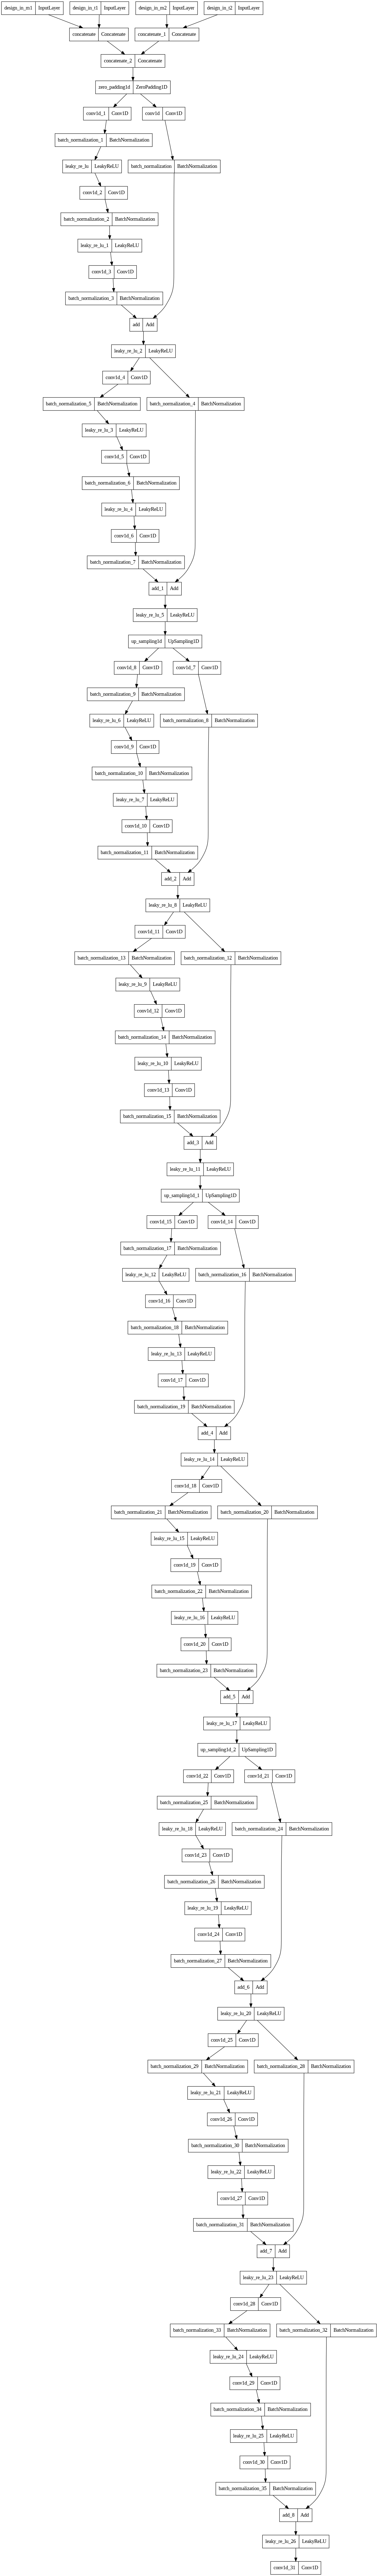

In [ ]:
from keras.utils import plot_model
plot_model(resnext_model)

In [ ]:
def residual_block(x_in, N_filter, kernel_size=3, strides=1,
                   conv_layer=keras.layers.Conv1D, alpha=0.3,
                   with_BN=False):
    """resnet block, default: 1D convolutions"""

    # residual connection
    if x_in.shape[-1] != N_filter or strides != 1:
        # if input!=output dimension: add BN/ReLU/conv. into shortcut
        conv_shortcut = conv_layer(
            filters=N_filter, kernel_size=1, strides=strides, padding='same')(x_in)
    else:
        # if input==output dimension: use bare input as shortcut
        conv_shortcut = x_in

    # convolutional path
    x = x_in

    x = conv_layer(filters=N_filter, kernel_size=1, strides=1,
                   padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha)(x)

    x = conv_layer(filters=N_filter, kernel_size=kernel_size,
                   strides=strides, padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha)(x)

    x = conv_layer(filters=N_filter, kernel_size=1, strides=1,
                   padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)

    # add residual and main and apply a further activation
    x = keras.layers.Add()([x, conv_shortcut])
    x = keras.layers.LeakyReLU(alpha)(x)

    return x

#  train the resNeXt model

In [ ]:
# compile with optimizer and cost function
resnext_model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.01),
                      loss='mse')

# atuomatic learning rate reduction
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=1/2, patience=4, verbose=1)



# callback for earlystopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)


# assemble fit config
train_kwargs = dict(x=[x_train_m1, x_train_m2, x_train_t1, x_train_t2],
                    y=y_train, validation_split=.2,
                    epochs=16, callbacks=[reduce_lr, early_stop])

# fit the model with BN --> increasing batchsize schdedule
hist = None  # global history after BS incrase
for i in range(4):  # 4x16 epochs, increasing batchsize
    _h = resnext_model.fit(batch_size=(16 * 2**i), **train_kwargs)
    if hist is None:
        hist = _h
    else:
        for k in hist.history:
            hist.history[k] = np.concatenate([hist.history[k], _h.history[k]])


Epoch 1/16
5451/5451 [==============================] - 361s 61ms/step - loss: 0.0303 - val_loss: 0.0180 - lr: 0.0100
Epoch 2/16
5451/5451 [==============================] - 309s 57ms/step - loss: 0.0158 - val_loss: 0.0121 - lr: 0.0100
Epoch 3/16
5451/5451 [==============================] - 311s 57ms/step - loss: 0.0114 - val_loss: 0.0112 - lr: 0.0100
Epoch 4/16
5451/5451 [==============================] - 324s 59ms/step - loss: 0.0087 - val_loss: 0.0066 - lr: 0.0100
Epoch 5/16
5451/5451 [==============================] - 309s 57ms/step - loss: 0.0073 - val_loss: 0.0063 - lr: 0.0100
Epoch 6/16
5451/5451 [==============================] - 311s 57ms/step - loss: 0.0065 - val_loss: 0.0065 - lr: 0.0100
Epoch 7/16
5451/5451 [==============================] - 321s 59ms/step - loss: 0.0060 - val_loss: 0.0056 - lr: 0.0100
Epoch 8/16
5451/5451 [==============================] - 298s 55ms/step - loss: 0.0059 - val_loss: 0.0052 - lr: 0.0100
Epoch 9/16
5451/5451 [==============================] - 

# plot loss

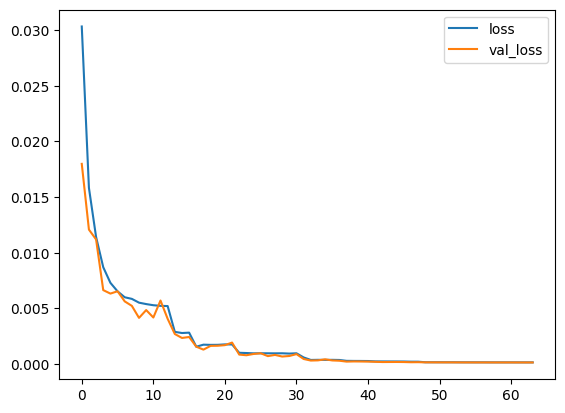

In [ ]:
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
# plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/abs-spectra-v3/models/resnext_model_history.npy',hist.history)

In [ ]:
resnext_model.save('/content/drive/MyDrive/abs-spectra-v3/models/resnext_model.keras')

# Validation

In [ ]:
loaded_fwd_model = keras.models.load_model('/content/drive/MyDrive/abs-spectra-v3/models/resnext_model/resnext_model.hd5')
loaded_fwd_model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.01),
                      loss='mse')

In [ ]:
loaded_fwd_model.evaluate([x_test_m1, x_test_m2, x_test_t1, x_test_t2], y_test)

180/180 [==============================] - 11s 20ms/step - loss: 1.1944e-04


0.00011943830759264529

In [ ]:
tf.expand_dims(x_test_m1[6], axis = 1)

<tf.Tensor: shape=(1, 1, 11), dtype=float32, numpy=array([[[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]], dtype=float32)>

1/1 [==============================] - 0s 46ms/step


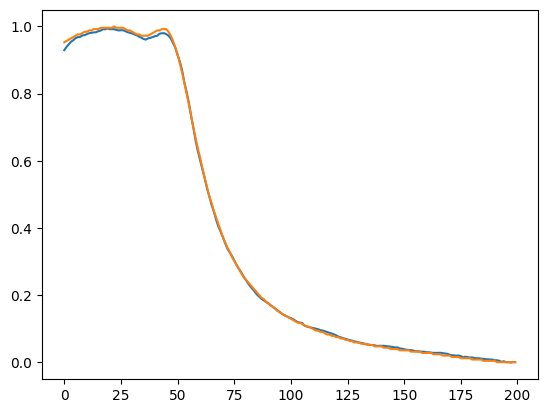

In [ ]:
i = 4595
pred = loaded_fwd_model.predict([tf.expand_dims(x_test_m1[i], axis = 1),
                                 tf.expand_dims(x_test_m2[i], axis = 1),
                                 x_test_t1[i],
                                 x_test_t2[i]])
plt.plot(pred[0])
plt.plot(y_test[i])